In [76]:
import numpy as np 
import pandas as pd 
import re  # search pattern in string ( text) 
import nltk # nlp 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [77]:
movie_reviews = pd.read_csv(r"C:\Data sciences all Important file\python code ML\DL\NLP\Movie review\Top Gun Marverick Movie Reviews.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

movie_reviews

,Unnamed: 0,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.realm,user.userId,user.accountLink,displayImageUrl
0,0,5.0,Even better than the first!! Tom Cruise is inc...,Megan,True,False,False,False,5.0,1h ago,Megan,Fandango,f87be09d-0895-4259-9238-267c77d72263,NaN,NaN
1,1,5.0,"Tom Cruise was awesome, great movie with spect...",Rosemary Coffer,True,False,False,False,5.0,1h ago,Rosemary Coffer,Fandango,7C6246D8-AEA3-4C2B-9889-C548E021CA95,NaN,NaN
2,2,5.0,Didn't care for the moving seats,Dorothy M,True,False,False,False,5.0,1h ago,Dorothy M,Fandango,BD64860E-F69E-460A-8D90-8F07A8DA5B3E,NaN,NaN
3,3,5.0,Great story good acting. Filled with excitemen...,Top Gun,True,False,False,False,5.0,1h ago,Top Gun,Fandango,f5f9488d-4ebb-419a-b029-2351be6941f7,NaN,NaN
4,4,5.0,Best movie weve seen in quite awhile! Lots of ...,Roxanna,True,False,False,False,5.0,1h ago,Roxanna,Fandango,7c8f4c0f-3ecc-4b30-9ecb-5ab7c51da6a4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,5.0,Una de las mejores películas que he visto en a...,Daniel P,False,False,False,False,5.0,"Jul 07, 2022",Daniel P,RT,979637485,/user/id/979637485,NaN
5006,5006,5.0,Exciting and entertaining,Margaret,True,False,False,False,5.0,"Jul 07, 2022",Margaret,Fandango,01c37721-76e7-4462-88ab-c90d0dee8c36,NaN,NaN
5007,5007,5.0,Best sequel and movie Ive seen in years!,Patti,True,False,False,False,5.0,"Jul 07, 2022",Patti,Fandango,8ad9d969-12d2-43ea-a82b-d4764e7cbda8,NaN,NaN
5008,5008,5.0,Terrific movie for all. Even my fiancé who doe...,PJ,True,False,False,False,5.0,"Jul 07, 2022",PJ,Fandango,FFFEDB86-D967-46B6-B673-986042956B27,NaN,NaN


In [78]:
movie_reviews.head()

,Unnamed: 0,rating,review,displayName,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,timeFromCreation,user.displayName,user.realm,user.userId,user.accountLink,displayImageUrl
0,0,5.0,Even better than the first!! Tom Cruise is inc...,Megan,True,False,False,False,5.0,1h ago,Megan,Fandango,f87be09d-0895-4259-9238-267c77d72263,NaN,NaN
1,1,5.0,"Tom Cruise was awesome, great movie with spect...",Rosemary Coffer,True,False,False,False,5.0,1h ago,Rosemary Coffer,Fandango,7C6246D8-AEA3-4C2B-9889-C548E021CA95,NaN,NaN
2,2,5.0,Didn't care for the moving seats,Dorothy M,True,False,False,False,5.0,1h ago,Dorothy M,Fandango,BD64860E-F69E-460A-8D90-8F07A8DA5B3E,NaN,NaN
3,3,5.0,Great story good acting. Filled with excitemen...,Top Gun,True,False,False,False,5.0,1h ago,Top Gun,Fandango,f5f9488d-4ebb-419a-b029-2351be6941f7,NaN,NaN
4,4,5.0,Best movie weve seen in quite awhile! Lots of ...,Roxanna,True,False,False,False,5.0,1h ago,Roxanna,Fandango,7c8f4c0f-3ecc-4b30-9ecb-5ab7c51da6a4,NaN,NaN


In [79]:
movie_reviews.shape

(5010, 15)

In [80]:
data=pd.DataFrame(movie_reviews.review)
data.head()

,review
0,Even better than the first!! Tom Cruise is inc...
1,"Tom Cruise was awesome, great movie with spect..."
2,Didn't care for the moving seats
3,Great story good acting. Filled with excitemen...
4,Best movie weve seen in quite awhile! Lots of ...


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5010 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB


In [9]:
data.iloc[2,0]

"Didn't care for the moving seats"

# Converted to Lower 

In [10]:
data.review = data.review.str.lower()

In [11]:
data.iloc[2,0]

"didn't care for the moving seats"

# Removing Url

In [12]:
data.review = data.review.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

"tom cruise was awesome, great movie with spectacular special effects. actually great job by all the actors, my 2nd time seeing this movie, that's how awesome it is."

# Remove punctuation

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(abc):
    text_nopunt="".join([c  # c= delhi
                         for c in abc # c = Delhi 
                         if c not in string.punctuation])
    return text_nopunt

In [15]:
data.review=data.review.apply(lambda x : remove_punctuation(x)) # Text = x

In [16]:
data.iloc[1,0]

'tom cruise was awesome great movie with spectacular special effects actually great job by all the actors my 2nd time seeing this movie thats how awesome it is'

# Remove Number

In [18]:
data.review = data.review.str.replace('\d+','')

In [19]:
data.iloc[2,0]

'didnt care for the moving seats'

# Removing Stop Words

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('English')

In [21]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data.iloc[2,0]

'didnt care for the moving seats'

In [23]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data.review = data.review.apply(lambda x: ' '.join([c   # form  is not added   # text = x
                                                      for c in x.split()  # c = from
                                                      if c not in (stop)]))

In [24]:
data.iloc[2,0]

'didnt care moving seats'

# Common Words

In [31]:
import nltk
nltk.download('words')
words=set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'extort',
 'battel',
 'formaldoxime',
 'metaleptically',
 'unpaved',
 'ilioischiac',
 'octarius',
 'Pitcairnia',
 'neurosclerosis',
 'prayerwise',
 'Provencial',
 'goblet',
 'overpay',
 'sprinkle',
 'vanmost',
 'unprofiteering',
 'dayshine',
 'plectospondyl',
 'unhandseled',
 'incontrovertibly',
 'casse',
 'narratory',
 'outhiss',
 'pelecypod',
 'connectant',
 'unjudicial',
 'Cenomanian',
 'banded',
 'intromission',
 'bowed',
 'search',
 'likelihood',
 'urgentness',
 'moire',
 'topeewallah',
 'Candace',
 'steelproof',
 'Hedysarum',
 'Phractamphibia',
 'chorister',
 'pulwar',
 'sneckdrawn',
 'Dinah',
 'endura',
 'Girondin',
 'sententiousness',
 'sclerification',
 'vacate',
 'reeper',
 'frayed',
 'meningomyelocele',
 'Taiping',
 'arachnitis',
 'phallist',
 'nursery',
 'subinform',
 'homeophony',
 'exact',
 'acquist',
 'Epicurean',
 'untinted',
 'choenix',
 'morphotropism',
 'gorlois',
 'transformingly',
 'clemently',
 'gossipy',
 'mistakeproof',
 'sacrocostal',
 'rapaceus',
 'predentary

In [32]:
text=data.review[3]
text

'great story good acting filled excitement suspense'

In [33]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('childhood pain|child|pain', '', text) #remove delhipolice
    text =  re.sub('movie|movies|movie','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

round2 = lambda x: clean_text_round2(x)

In [34]:
data.iloc[3,0]

'great story good acting filled excitement suspense'

In [35]:
# Let's take a look at the updated text
data = pd.DataFrame(data.review.apply(round2))
data.iloc[3,0]

'great story good acting filled excitement suspense'

# Lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [38]:
data.iloc[3,0]

'great story good acting filled excitement suspense'

In [39]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pratiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
data.review = data.review.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[3,0]

'great story good act fill excitement suspense'

# Strip extra whitespace

In [41]:
data.iloc[3,0]

'great story good act fill excitement suspense'

In [42]:
data.review = data.review.str.rstrip()
data.iloc[3,0]

'great story good act fill excitement suspense'

* Finished Data Pre-Processing or Data Cleaning

### Document-Term Matrix

In [43]:
data.head()

,review
0,even better first cruise incredibly likable fi...
1,cruise awesome great spectacular special effec...
2,didnt care move
3,great story good act fill excitement suspense
4,best weve see quite awhile lot high speed acti...


In [68]:
data.review[3]

'great story good act fill excitement suspense'

In [46]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.review)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,5000,5001,5002,5003,5004,5005,5006,5007,5008,5009
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abound,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abrupt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youve,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5001,5002,5003,5004,5005,5006,5007,5008,5009,freq
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
abound,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abrupt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,5001,5002,5003,5004,5005,5006,5007,5008,5009,freq
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
3,abound,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,abrupt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
1199,great,1552
33,action,1099
1177,good,915
1835,original,780
2704,time,668
...,...,...
2005,precise,1
2004,precede,1
892,euphoria,1
893,evaluate,1


# Barplot 

In [50]:
tdm1.head(10)

,Word,freq
1199,great,1552
33,action,1099
1177,good,915
1835,original,780
2704,time,668
2516,story,643
1216,gun,634
275,best,614
626,cruise,524
2913,watch,490


In [53]:
w = tdm1[tdm1['freq'] >500]
w

,Word,freq
1199,great,1552
33,action,1099
1177,good,915
1835,original,780
2704,time,668
2516,story,643
1216,gun,634
275,best,614
626,cruise,524


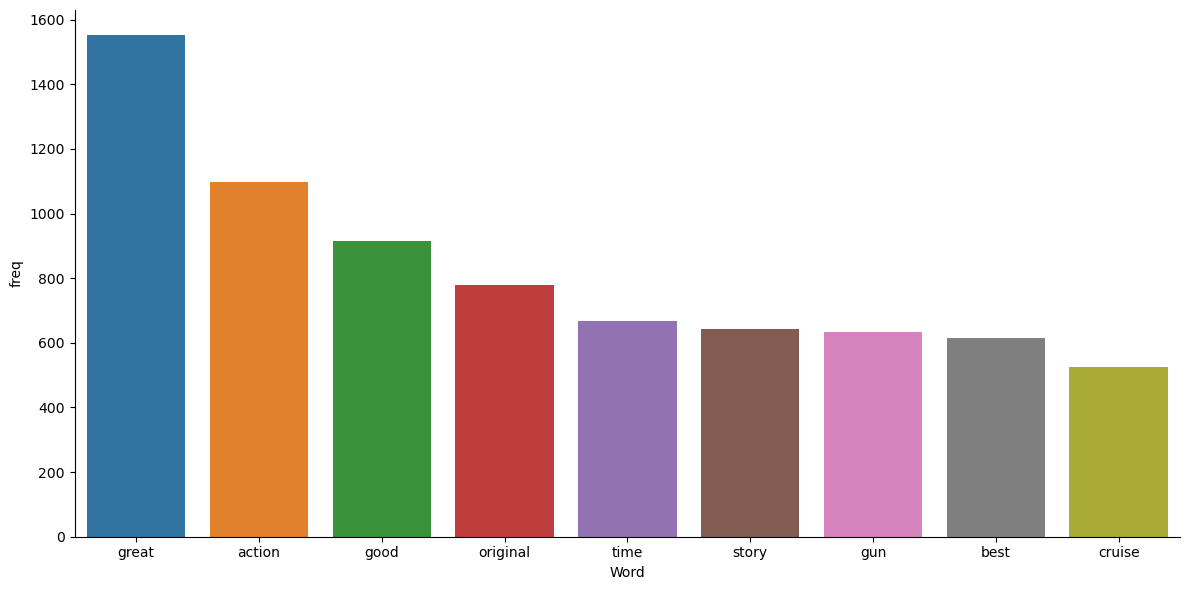

In [54]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [55]:
text = " ".join(review for review in data.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 291404 words in the combination of all review.


In [56]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Pratiksha\anaconda3\python.exe -m pip install --upgrade pip' command.


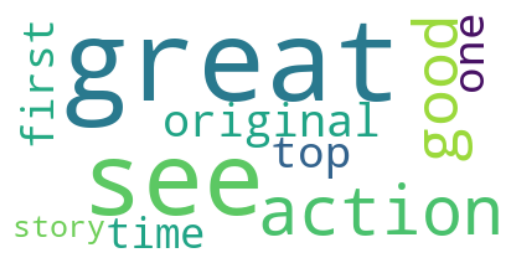

In [82]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cloud Wordcloud

In [59]:
import os 
os.chdir(r"C:\Data sciences all Important file\python code ML\DL\NLP\Movie review") 

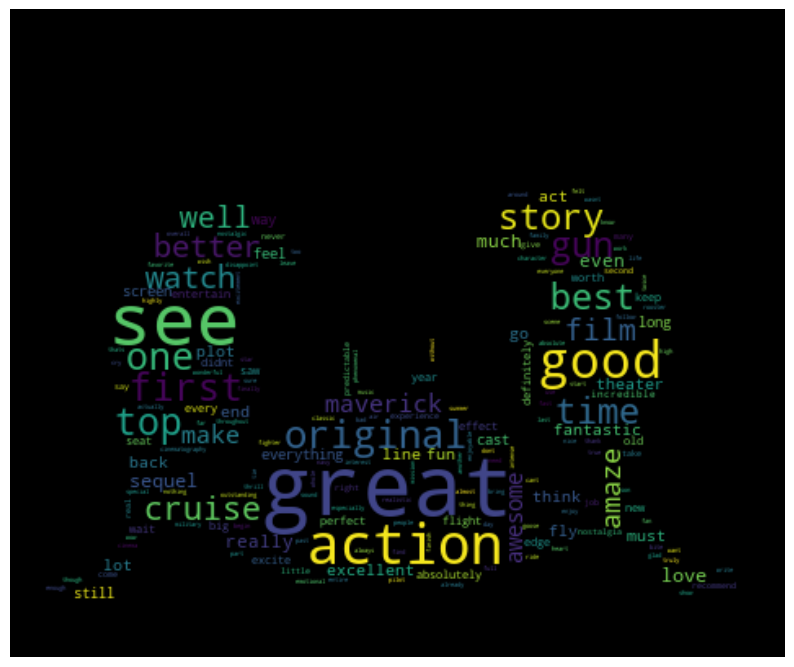

In [60]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("m.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='black',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis 

In [61]:
data

,review
0,even better first cruise incredibly likable fi...
1,cruise awesome great spectacular special effec...
2,didnt care move
3,great story good act fill excitement suspense
4,best weve see quite awhile lot high speed acti...
...,...
5005,las visto
5006,excite entertain
5007,best sequel see
5008,terrific even typically like kind


In [64]:
data=data.drop_duplicates('review')
data

,review
0,even better first cruise incredibly likable fi...
1,cruise awesome great spectacular special effec...
2,didnt care move
3,great story good act fill excitement suspense
4,best weve see quite awhile lot high speed acti...
...,...
5005,las visto
5006,excite entertain
5007,best sequel see
5008,terrific even typically like kind


In [65]:
from textblob import TextBlob

pol =lambda x: TextBlob(x).sentiment.polarity
data['polarity']=data['review'].apply(pol)
data.head(5)

,review,polarity
0,even better first cruise incredibly likable fi...,0.416667
1,cruise awesome great spectacular special effec...,0.759524
2,didnt care move,0.000000
3,great story good act fill excitement suspense,0.750000
4,best weve see quite awhile lot high speed acti...,0.284000


In [66]:
data['Sentiment']=np.where(data['polarity']>=0,'Positive','Negative')
data

,review,polarity,Sentiment
0,even better first cruise incredibly likable fi...,0.416667,Positive
1,cruise awesome great spectacular special effec...,0.759524,Positive
2,didnt care move,0.000000,Positive
3,great story good act fill excitement suspense,0.750000,Positive
4,best weve see quite awhile lot high speed acti...,0.284000,Positive
...,...,...,...
5005,las visto,0.000000,Positive
5006,excite entertain,0.000000,Positive
5007,best sequel see,1.000000,Positive
5008,terrific even typically like kind,0.144444,Positive


<AxesSubplot:>

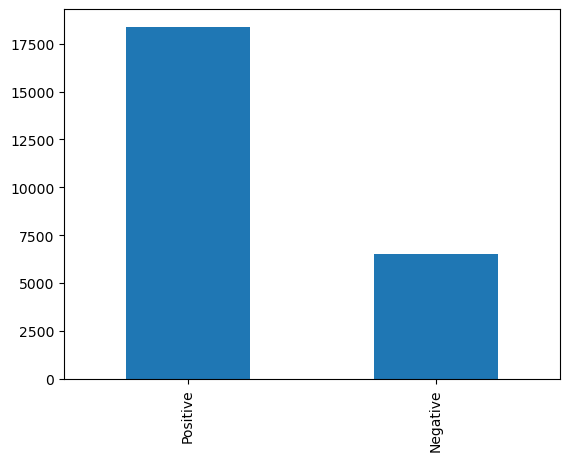

In [55]:
data.Sentiment.value_counts().plot.bar()

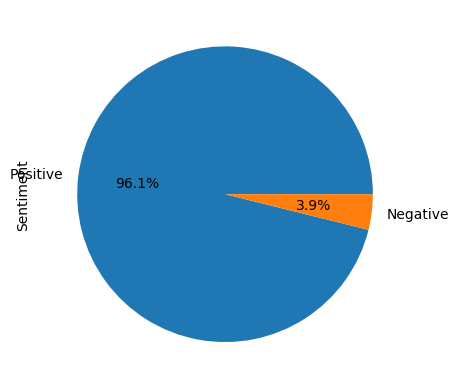

In [67]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [89]:
w = tdm1[tdm1['freq'] >9]
w

,Word,freq
1199,great,1552
33,action,1099
1177,good,915
1835,original,780
2704,time,668
...,...,...
1032,fit,10
2879,video,10
418,chance,10
788,drag,10
